# project title

## Setup

### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
path = r"..\dataset\king_ country_ houses_aa.csv"

data = pd.read_csv(path)

df = data.copy()

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Column rename

In [3]:
# Print the column names
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='str')


In [4]:
new_cols = []

# Loop through each column name of the DataFrame
for col in list(df.columns):
    new_col = col.strip().lower().replace(" ", "_")
    new_cols.append(new_col)

# Reassign the column names to DataFrame 
df.columns = new_cols

# Confirm changes
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='str')

In [5]:
# price_col = df.pop('price')  # Remove column
# df['price'] = price_col      # Add it back at the end

In [6]:
description = {
    'id': 'Unique identifier for each house',
    'date': 'Date when the house was sold',
    'price': 'Sale price of the house (target variable)',
    'bedrooms': 'Total number of bedrooms',
    'bathrooms': 'Total number of bathrooms (fractional values allowed: 0.5 = half bath, 0.75 = three-quarter bath)',
    'sqft_living': 'Interior living area in square feet',
    'sqft_lot': 'Lot size in square feet',
    'floors': 'Number of floors (can include half floors like 1.5)',
    'waterfront': 'Whether the house has waterfront access (0 = No, 1 = Yes)',
    'view': 'Quality of view rating (0–4 scale)',
    'condition': 'Overall condition rating (1–5 scale)',
    'grade': 'Construction and design grade (1–13 scale)',
    'sqft_above': 'Square footage above ground level',
    'sqft_basement': 'Square footage of basement',
    'yr_built': 'Year the house was built',
    'yr_renovated': 'Year the house was renovated (0 if never renovated)',
    'zipcode': 'ZIP code (categorical location variable)',
    'lat': 'Latitude coordinate',
    'long': 'Longitude coordinate',
    'sqft_living15': 'Average living area of 15 nearest neighboring houses',
    'sqft_lot15': 'Average lot size of 15 nearest neighboring houses'
}
def all_cols_descrition():
    return description

def col_description(col_name):
     print(description[col_name])

In [7]:
col_description('sqft_lot15')

Average lot size of 15 nearest neighboring houses


## Data Overview

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.shape

(21613, 21)

In [10]:
df.dtypes

id                 int64
date                 str
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [11]:
df.date = df.date.astype('object')
print(df.date.dtypes)

object


### Duplicate records

In [12]:
def duplicate_records(datafame):
    duplicate_count = datafame.duplicated().sum()

    if duplicate_count == 0:
        print(f"No duplicate records found: {duplicate_count}")
    else:
        print(f"The dataset has duplicate records: {duplicate_count}")

duplicate_records(df)

No duplicate records found: 0


### Missing values

In [13]:
def missing_values(dataframe):
    missing_count = dataframe.isna().sum()
    total_missing_count = missing_count.sum()

    if total_missing_count == 0:
        print(f"No missing values found in the dataset")
        return  missing_count
    else:
        print(f"Missing values found in the dataset")
        return missing_count
    
missing_values(df)

No missing values found in the dataset


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Question: What we can remove for first baseline model?
- Since we checked our data already and we can donot have missing values and duplicate records.

- But we have ``id`` and ``date`` column which we can drop fro our first baseline model.

After baseline model
- Column ``bedrooms`` has max value of 33 Bedrooms. But  75% of the data has lies with 4 number of rooms.

- Treat columns  ``zipcode``, ``lat`` and ``long``. 

## Linear Regression

### Baseline Model (v0.0)

- This baseline model is based on the 

In [15]:
df_baseline = df.drop(columns=['id', 'date'])
df_baseline.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Split Dataset

In [16]:
from utils.split_dataset import split_dataset

X = df_baseline.drop(columns=['price']) 
y = df_baseline['price']

X_train, X_test, y_train, y_test= split_dataset(df_baseline, 'price')

X_train: (17290, 18)
X_test : (4323, 18)
y_train: (17290,)
y_test : (4323,)


#### Train Model

In [17]:
# Initilise the baseline model
lr = LinearRegression()

# Fit the data
lr_baseline_model = lr.fit(X_train, y_train)

# Predictions
y_pred_test = lr_baseline_model.predict(X_test)
y_pred_train = lr_baseline_model.predict(X_train)

#### Model Evaluation

In [18]:
from utils.model_evaluation import model_evaluation

model_evaluation(y_train, y_pred_train, y_test, y_pred_test, 'baseline')

Model Evaluation - baseline

R2 Score
Train: 0.6991
Test : 0.7012

MAE
Train: 125033.1649
Test : 127493.3421

RMSE
Train: 198272.2430
Test : 212539.5166


**Interpretation**

- Model is stable, no sign of ovrfitting. 

- Model explains 70%

### Scaled Model (v0.1)
- We implement the scaling on the dataset that we have used to train the baseline model.

- After scaling we train the model again on the scaled dataset and observe any changes in model performance. 

#### Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

#### Train Model

In [20]:
# Fit model with scaled dataset
lr_baseline_scaled_model = lr.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_scaled = lr_baseline_scaled_model.predict(X_train_scaled)
y_test_pred_scaled = lr_baseline_scaled_model.predict(X_test_scaled)

#### Model Evaluation

In [21]:
model_evaluation(y_train, y_train_pred_scaled, y_test, y_test_pred_scaled, 'scaled')

Model Evaluation - scaled

R2 Score
Train: 0.6991
Test : 0.7012

MAE
Train: 125033.1649
Test : 127493.3421

RMSE
Train: 198272.2430
Test : 212539.5166


In [22]:
df.sample(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3648,7338402690,20150401T000000,335000.0,6,2.0,2020,7071,1.0,0,0,...,7,1010,1010,1979,0,98108,47.5329,-122.294,2020,5000


In [23]:
df_baseline.sample(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13970,600000.0,4,2.5,2070,8127,1.5,0,0,3,9,1590,480,1924,2003,98125,47.7316,-122.289,2050,8131


In [62]:
df_baseline.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Data Cleaning Model (v0.2)

- since we already checked that our dataset doesnot have missing values but we have found some invalid values and abnormalities in our dataset which we explored further and try to rectify them.

In [63]:
df = df_baseline.copy()

In [64]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Handle Invalid Values


##### bedrooms

In [27]:
df.bedrooms.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [28]:
np.sort(df.bedrooms.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 33])

In [29]:
df[df.bedrooms==0].value_counts().sum()

np.int64(13)

In [30]:
df[df['bedrooms'] == 0][['sqft_living', 'price']].sort_values(by='sqft_living')

,sqft_living,price
19452,290,142000.0
18379,384,265000.0
4868,390,228000.0
14423,844,139950.0
3467,1430,288000.0
9854,1470,235000.0
3119,1470,380000.0
12653,1490,320000.0
8484,1810,240000.0
8477,2290,339950.0


- There are 13 houses where the number of bedrooms is recorded as 0.

- The typical (median) number of bedrooms in the dataset is 3.

- We could replace 0 with 3, but that would not be correct.

- A very small house (like 290 sqft) could be a studio with no separate bedroom.

- But a very large house (like 4810 sqft) cannot realistically have 0 bedrooms.

- If we change all of them to 3 bedrooms, we create unrealistic data.

- This would add incorrect information and affect the model.

- So, it is better to remove these 13 records instead of filling them.

In [31]:
df = df[df.bedrooms>0]
print(df[df.bedrooms==0].value_counts().sum())

0


##### bathrooms

- Similarly we can check the values for bathrooms and we can decide should we impute the values or drop the values.

In [34]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402029e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.671337e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [39]:
col_description('grade')

Construction and design grade (1–13 scale)


In [36]:
all_cols_descrition()

{'id': 'Unique identifier for each house',
 'date': 'Date when the house was sold',
 'price': 'Sale price of the house (target variable)',
 'bedrooms': 'Total number of bedrooms',
 'bathrooms': 'Total number of bathrooms (fractional values allowed: 0.5 = half bath, 0.75 = three-quarter bath)',
 'sqft_living': 'Interior living area in square feet',
 'sqft_lot': 'Lot size in square feet',
 'floors': 'Number of floors (can include half floors like 1.5)',
 'waterfront': 'Whether the house has waterfront access (0 = No, 1 = Yes)',
 'view': 'Quality of view rating (0–4 scale)',
 'condition': 'Overall condition rating (1–5 scale)',
 'grade': 'Construction and design grade (1–13 scale)',
 'sqft_above': 'Square footage above ground level',
 'sqft_basement': 'Square footage of basement',
 'yr_built': 'Year the house was built',
 'yr_renovated': 'Year the house was renovated (0 if never renovated)',
 'zipcode': 'ZIP code (categorical location variable)',
 'lat': 'Latitude coordinate',
 'long': 'L

In [32]:
df[df.bathrooms==0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
5832,280000.0,1,0.0,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
10481,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290


In [33]:
# Since these are only 3 records.
# So we can drop these records.

df = df[df['bathrooms'] > 0]
print(df[df.bathrooms==0].value_counts().sum())

0


In [37]:
df.view.unique()

array([0, 3, 4, 2, 1])

##### Zipcode



In [40]:
print(df.zipcode.dtypes, df.zipcode.nunique())
print(df.zipcode.unique())

int64 70
[98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]


In [66]:
df_baseline.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [41]:
zip_price_mean = df.groupby('zipcode')['price'].mean().round(2).sort_values()
zip_price_mean

# This confirms that zip code has influence of pricing.
# Treating it as numeric would make the model assume.
# Model can learn that higher zipcode means higher price (which is incorrect logic).

zipcode
98002     234284.04
98168     240328.37
98032     251296.24
98001     281194.87
98148     284908.60
            ...    
98102     899395.37
98112    1095499.34
98040    1194230.02
98004    1355927.08
98039    2160606.60
Name: price, Length: 70, dtype: float64

In [42]:
# We can change the data type from int to category
# Category types make it store in discrete groups  
df.zipcode = df.zipcode.astype('category')
df.dtypes

price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront          int64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

In [43]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [44]:
df.shape

(21597, 19)

In [45]:
df_zipcode_dummies = pd.get_dummies(df, columns=['zipcode'], drop_first=True)
df_zipcode_dummies.shape

(21597, 87)

In [46]:
df_zipcode_dummies.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'z

In [67]:
df_zipcode_dummies.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,False,False,False,False,False,False,True,False,False,False
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,False,False,False,False,False,False,False,False,False,False
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,False,False,False,False,False,False,False,False,False,False
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,False,False,False,False,False,False,False,False,False,False
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,False,False,False,False,False,False,False,False,False,False


#### Spilt Dataset

In [57]:
X_train, X_test, y_train, y_test = split_dataset(df_zipcode_dummies, 'price')

X_train: (17277, 86)
X_test : (4320, 86)
y_train: (17277,)
y_test : (4320,)


#### Train Model

In [58]:
# Fit model with scaled dataset
lr_removed_invalid_values = lr.fit(X_train, y_train)

# Predictions
y_pred_train_invalid = lr_removed_invalid_values.predict(X_train)
y_pred_test_invalid = lr_removed_invalid_values.predict(X_test)

#### Model Evaluation

In [59]:
model_evaluation(y_train, y_pred_train_invalid, y_test, y_pred_test_invalid, 'Corrected invalid values')

Model Evaluation - Corrected invalid values

R2 Score
Train: 0.8114
Test : 0.7943

MAE
Train: 95834.8618
Test : 97267.2833

RMSE
Train: 160135.6776
Test : 163593.1744


## Outlier Treatment(v0.2)

In [60]:
df1 = df.copy()

In [68]:
df1.sample()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17032,303000.0,4,1.0,2300,9583,1.0,0,0,3,6,1220,1080,1928,0,98024,47.5671,-121.89,1200,11325


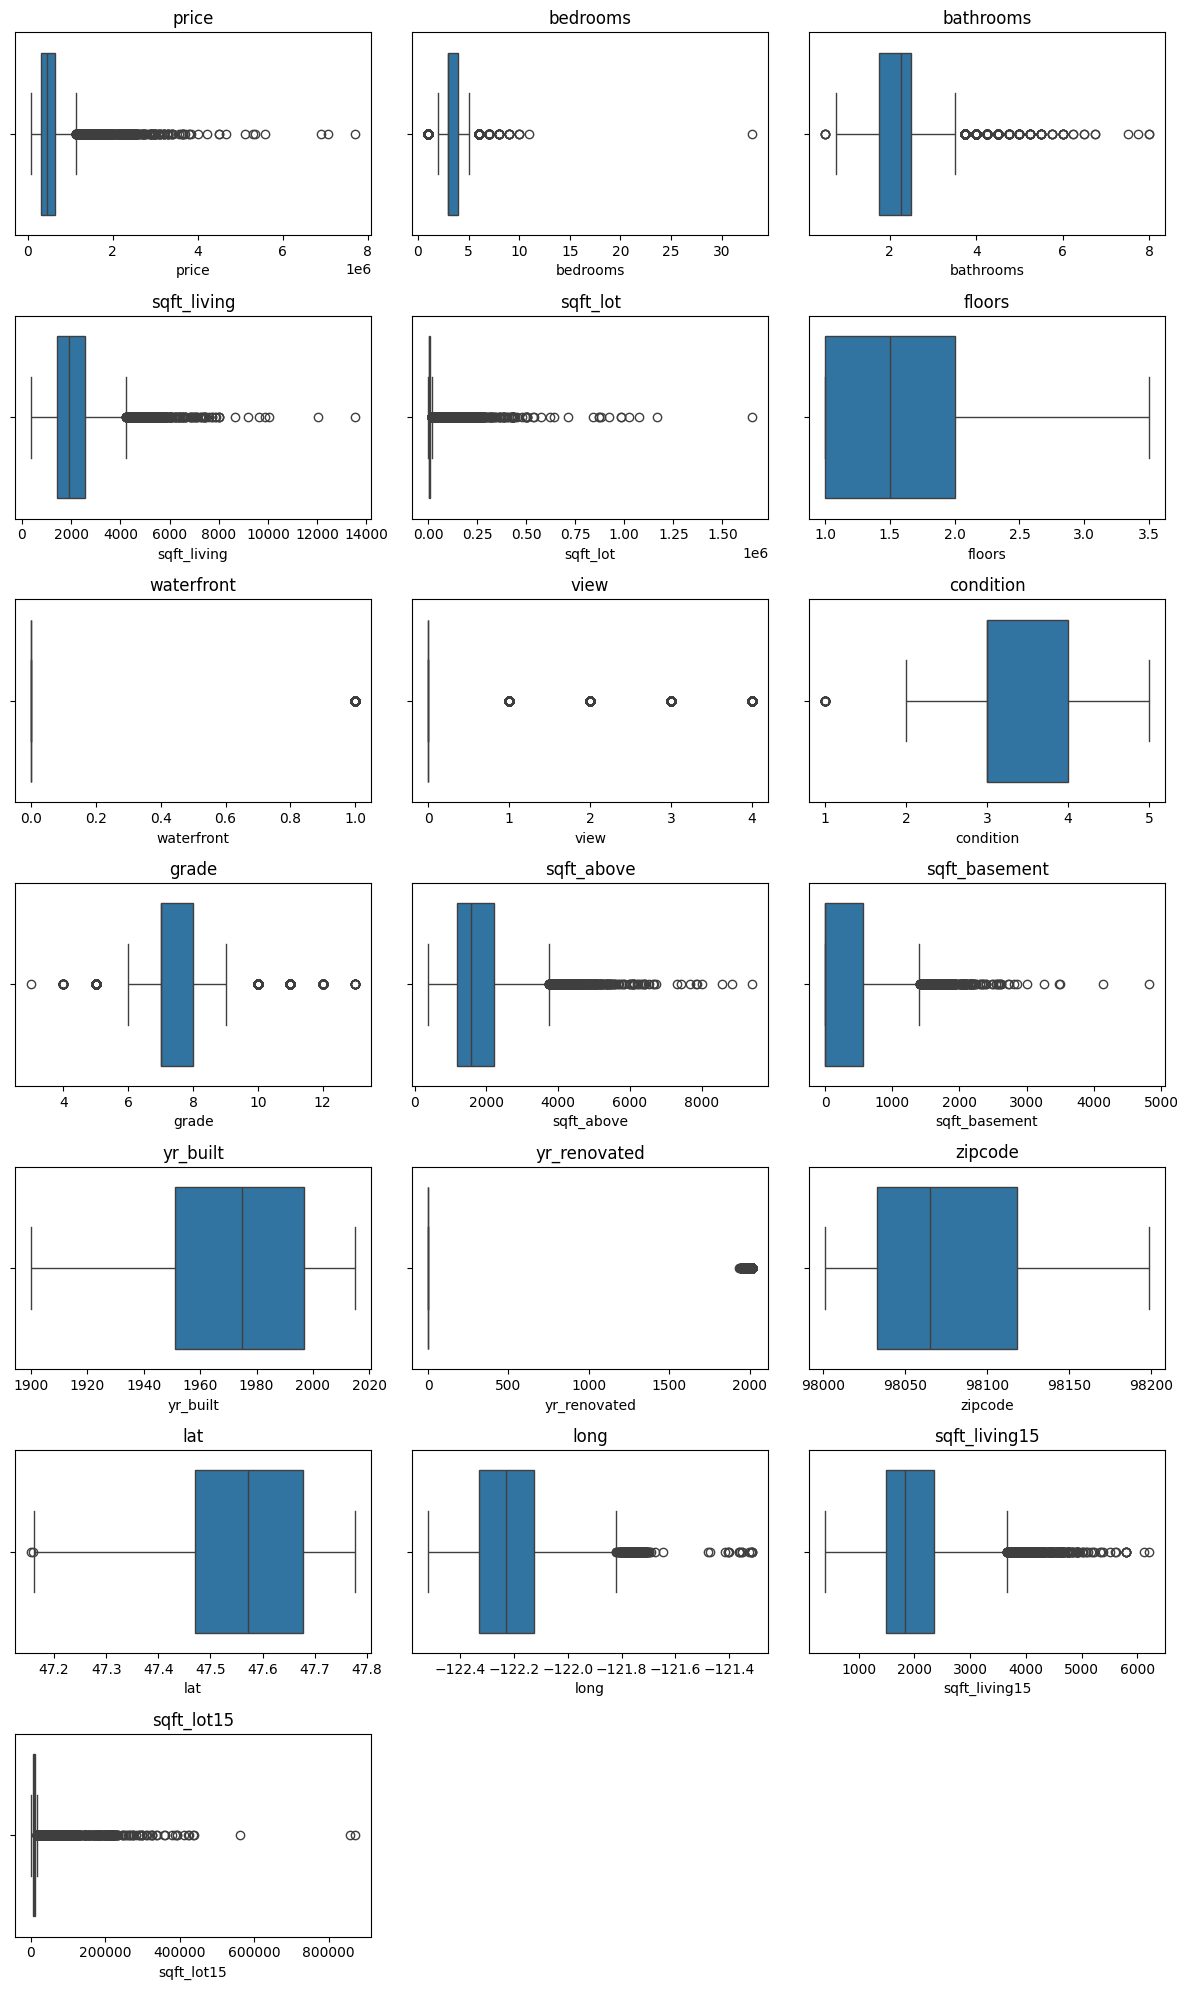

In [69]:
plt.figure(figsize=(12, 20))

for i, col in enumerate(df1.columns, start=1):
    plt.subplot(7, 3, i)
    sns.boxplot(x=df1[col])
    plt.title(col)
    plt.ylabel("")

plt.tight_layout()
plt.show()

In [70]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='str')

In [71]:
num_cols = df1.select_dtypes(include=['int', 'float'])
num_cols.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='str')

In [73]:
outliers_cols = list(num_cols.drop(columns=['price', 'sqft_lot', 'lat', 'long', 'yr_renovated', 'yr_built', 'sqft_lot15']))
outliers_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15']

In [74]:
len(df1.columns)

19

In [75]:
len(outliers_cols)

11

In [76]:
from utils.remove_outlier import remove_outliers_iqr
for col in outliers_cols:
    df_outlier_clean = remove_outliers_iqr(df1, columns= outliers_cols)

df_outlier_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


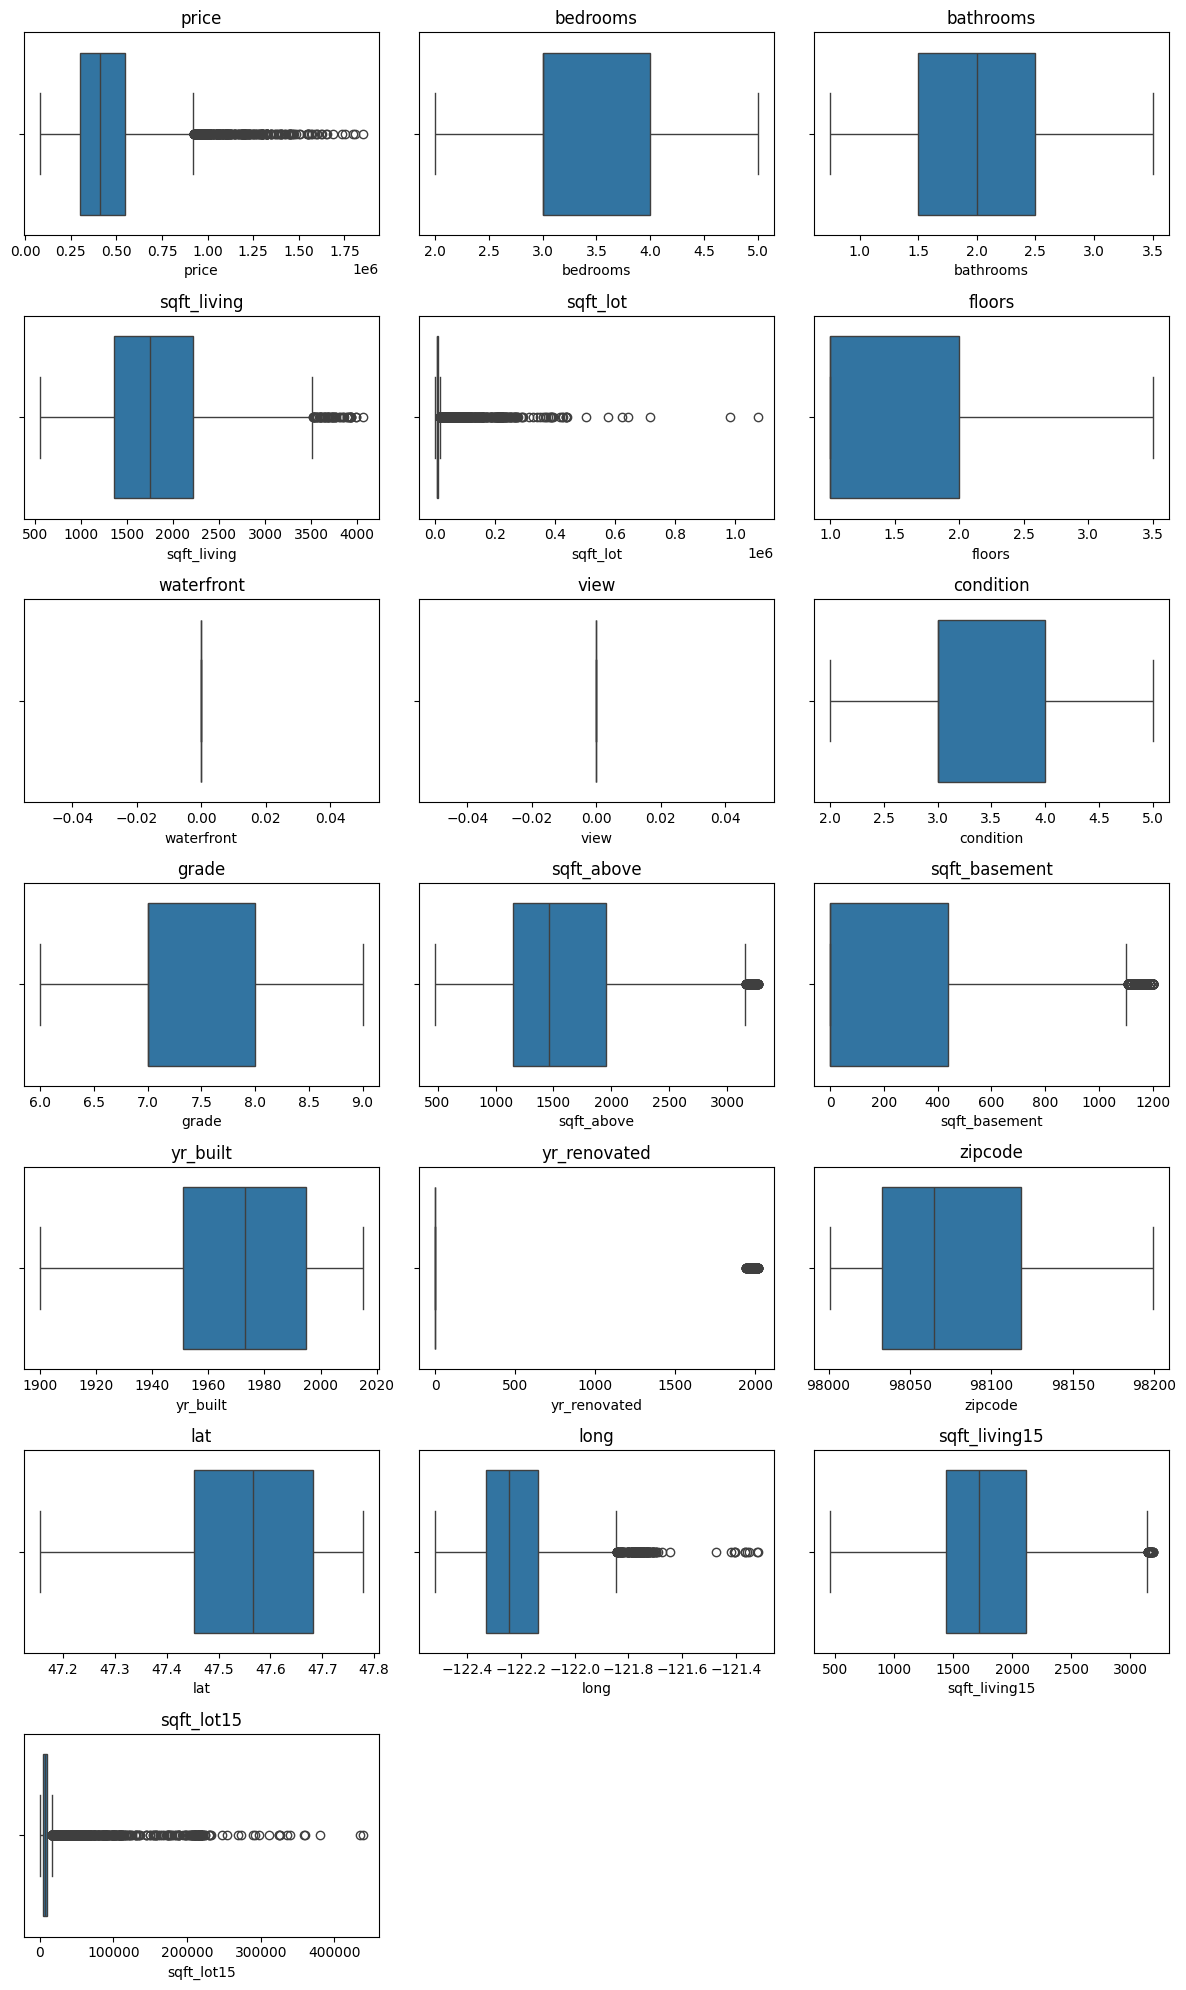

In [77]:
plt.figure(figsize=(12, 20))

for i, col in enumerate(df_outlier_clean.columns, start=1):
    plt.subplot(7, 3, i)
    sns.boxplot(x=df_outlier_clean[col])
    plt.title(col)
    plt.ylabel("")

plt.tight_layout()
plt.show()

In [80]:
df.shape

(21613, 19)

In [78]:
df_outlier_clean.shape

(16640, 19)

In [79]:
df_outlier_clean_dummmies = pd.get_dummies(df_outlier_clean, columns=['zipcode'], drop_first=True)

df_outlier_clean_dummmies.shape

(16640, 87)

#### Split Dataset

In [81]:
X_train, X_test, y_train, y_test=split_dataset(df_outlier_clean_dummmies, 'price')

X_train: (13312, 86)
X_test : (3328, 86)
y_train: (13312,)
y_test : (3328,)


#### Train model

In [82]:
# Fit model with scaled dataset
lr_outlier_removed = lr.fit(X_train, y_train)

# Predictions
y_pred_train= lr_outlier_removed.predict(X_train)
y_pred_test = lr_outlier_removed.predict(X_test)

#### Modal Evaluation

In [83]:
model_evaluation(y_train, y_pred_train, y_test, y_pred_test, 'oultier removed')

Model Evaluation - oultier removed

R2 Score
Train: 0.8060
Test : 0.7908

MAE
Train: 59662.3232
Test : 61051.9193

RMSE
Train: 86308.3902
Test : 86677.5237


## F. Transformation Model

In [ ]:
df_outlier_clean.shape

In [ ]:
df = df_outlier_clean.copy()

In [ ]:
df.head()

##### yr_renovated

- this column tells wheather house went through renovation or not. 

- Most values are 0 which means these houses were never renovated. This create a problem becasue model picks 0 as very old renovations. it can learn that house price are lower or higher when it is lower value of year. 

What we can do here?

- we can create a flag or indicator wheather house is renovated or not.

In [ ]:
df.yr_renovated.value_counts()

In [84]:
df.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [85]:
df.yr_renovated.value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1948        1
1951        1
1959        1
1934        1
1944        1
Name: count, Length: 70, dtype: int64

In [86]:
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df.renovated.value_counts()

renovated
0    20699
1      914
Name: count, dtype: int64

In [87]:
df.yr_renovated.value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1948        1
1951        1
1959        1
1934        1
1944        1
Name: count, Length: 70, dtype: int64

In [88]:
df.drop(columns=['yr_renovated'], inplace=True)
df.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
9520,550000.0,4,1.75,2150,9000,1.0,0,0,4,7,1110,1040,1966,98052,47.6812,-122.113,2040,9000,0
16912,346500.0,3,3.25,1570,2048,2.0,0,0,3,8,1290,280,2006,98126,47.5480,-122.375,1570,2006,0
18023,980000.0,3,2.25,2390,4590,2.0,0,0,3,8,2090,300,1941,98105,47.6615,-122.276,2280,5179,1
16963,325000.0,4,2.50,2160,6825,2.0,0,0,3,8,2160,0,1994,98031,47.4111,-122.200,2020,7035,0
9842,225000.0,4,1.00,1150,6000,1.5,0,0,3,6,1150,0,1907,98118,47.5620,-122.283,840,3030,0


#### 
#### 